<a href="https://colab.research.google.com/github/het1752/machine-learning/blob/main/Student_placement_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

About Dataset
A University Announced Its On-Campus Placement Records For The Engineering Course. The Data Is From The Years 2013 And 2014.
The Following Is The College Placements Data Compiled Over 2 years. Use This Data To Predict And Analyse Whether A Student Gets Placed, Based On His/Her Background.

Link of dataset:https://www.kaggle.com/datasets/tejashvi14/engineering-placements-prediction

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("/content/collegePlace.csv")
data.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [4]:
data.columns

Index(['Age', 'Gender', 'Stream', 'Internships', 'CGPA', 'Hostel',
       'HistoryOfBacklogs', 'PlacedOrNot'],
      dtype='object')

In [5]:
data.describe()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
count,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
mean,21.485840,0.703641,7.073837,0.269049,0.192178,0.552596
std,1.324933,0.740197,0.967748,0.443540,0.394079,0.497310
min,19.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,6.000000,0.000000,0.000000,0.000000
50%,21.000000,1.000000,7.000000,0.000000,0.000000,1.000000
75%,22.000000,1.000000,8.000000,1.000000,0.000000,1.000000
max,30.000000,3.000000,9.000000,1.000000,1.000000,1.000000


In [6]:
data.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

In [7]:
# convert stream and gender into numeric formusing get_dummies method
data=pd.get_dummies(data,['Gender','Stream'],drop_first=True)

In [8]:
data.head()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot,Gender_Male,Stream_Computer Science,Stream_Electrical,Stream_Electronics And Communication,Stream_Information Technology,Stream_Mechanical
0,22,1,8,1,1,1,1,0,0,1,0,0
1,21,0,7,1,1,1,0,1,0,0,0,0
2,22,1,6,0,0,1,0,0,0,0,1,0
3,21,0,8,0,1,1,1,0,0,0,1,0
4,22,0,8,1,0,1,1,0,0,0,0,1


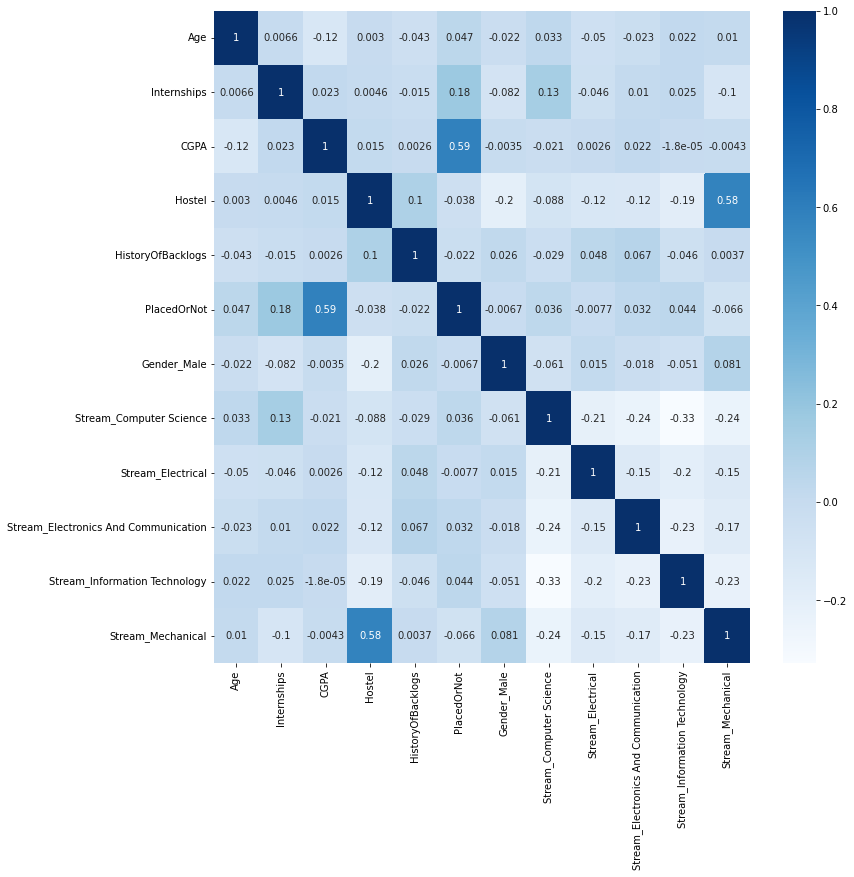

In [9]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),annot=True,cmap='Blues')

In [10]:
# delete non important coulmns
data.drop(['Hostel'],inplace=True,axis=1)

In [11]:
data.columns

Index(['Age', 'Internships', 'CGPA', 'HistoryOfBacklogs', 'PlacedOrNot',
       'Gender_Male', 'Stream_Computer Science', 'Stream_Electrical',
       'Stream_Electronics And Communication', 'Stream_Information Technology',
       'Stream_Mechanical'],
      dtype='object')

In [12]:
# so lets start to apply machine learning algo. for prediction
x=data.drop('PlacedOrNot',axis=1)
y=data.PlacedOrNot

In [13]:
x.shape,y.shape

((2966, 10), (2966,))

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

[[194  86]
 [ 80 234]]
Precision: 0.73125
recall: 0.7452229299363057
f1_score: 0.7381703470031546
      Actual Value   Predicted Value
2395              0                0
794               1                1
1894              1                1
332               0                1
2023              0                0
...             ...              ...
1938              1                1
2607              1                1
1395              0                0
602               1                1
2308              1                1

[594 rows x 2 columns]
                 Actual Value   Predicted Value
Actual Value          1.000000         0.438679
Predicted Value       0.438679         1.000000
AxesSubplot(0.125,0.125;0.62x0.755)


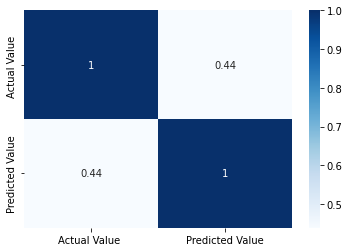

In [15]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
model0=LogisticRegression()
model0.fit(x_train,y_train)
pred_y0=model0.predict(x_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred_y0))
import sklearn
print('Precision:', sklearn.metrics.precision_score(y_test,pred_y0))
print('recall:', sklearn.metrics.recall_score(y_test,pred_y0))
print('f1_score:', sklearn.metrics.f1_score(y_test,pred_y0))
pred_df=pd.DataFrame({"Actual Value ":y_test,"Predicted Value":pred_y0})
print(pred_df)
print(pred_df.corr())
print(sns.heatmap(pred_df.corr(),annot=True,cmap="Blues"))

[[260  20]
 [ 50 264]]
Precision: 0.9295774647887324
recall: 0.8407643312101911
f1_score: 0.8829431438127091
      Actual Value   Predicted Value
2395              0                0
794               1                1
1894              1                1
332               0                0
2023              0                0
...             ...              ...
1938              1                1
2607              1                1
1395              0                0
602               1                1
2308              1                1

[594 rows x 2 columns]
                 Actual Value   Predicted Value
Actual Value          1.000000         0.768811
Predicted Value       0.768811         1.000000
AxesSubplot(0.125,0.125;0.62x0.755)


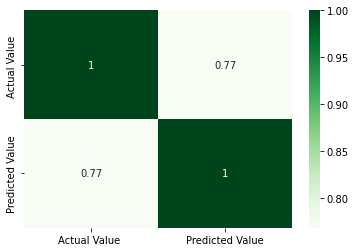

In [16]:
#randomforest
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)
pred_y1=model.predict(x_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred_y1))
import sklearn
print('Precision:', sklearn.metrics.precision_score(y_test,pred_y1))
print('recall:', sklearn.metrics.recall_score(y_test,pred_y1))
print('f1_score:', sklearn.metrics.f1_score(y_test,pred_y1))
pred_df=pd.DataFrame({"Actual Value ":y_test,"Predicted Value":pred_y1})
print(pred_df)
print(pred_df.corr())
print(sns.heatmap(pred_df.corr(),annot=True,cmap="Greens"))

[[263  17]
 [ 52 262]]
Precision: 0.9390681003584229
recall: 0.8343949044585988
f1_score: 0.8836424957841484
      Actual Value   Predicted Value
2395              0                0
794               1                1
1894              1                1
332               0                0
2023              0                0
...             ...              ...
1938              1                1
2607              1                1
1395              0                0
602               1                1
2308              1                1

[594 rows x 2 columns]
                 Actual Value   Predicted Value
Actual Value          1.000000         0.773835
Predicted Value       0.773835         1.000000
AxesSubplot(0.125,0.125;0.62x0.755)


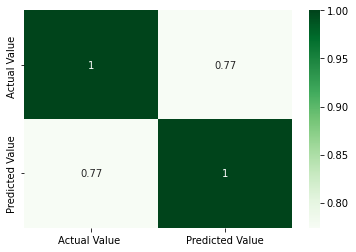

In [17]:
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier()
model2.fit(x_train,y_train)
pred_y2=model2.predict(x_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred_y2))
import sklearn
print('Precision:', sklearn.metrics.precision_score(y_test,pred_y2))
print('recall:', sklearn.metrics.recall_score(y_test,pred_y2))
print('f1_score:', sklearn.metrics.f1_score(y_test,pred_y2))
pred_df=pd.DataFrame({"Actual Value ":y_test,"Predicted Value":pred_y2})
print(pred_df)
print(pred_df.corr())
print(sns.heatmap(pred_df.corr(),annot=True,cmap="Greens"))